In [1]:
import requests
import datetime
import os
import json
import csv
import matplotlib.pyplot as plt
import pandas as pd
#import numpy as np
from wordcloud import WordCloud

In [2]:
def validate_date(x):    
    try:       
        datetime.datetime.strptime(x, '%Y-%m-%d')          
        return True 
    except: 
        return False


In [3]:
#On demande à l'utilisateur de saisir des informations
station = input("Saisir une station météo : ")
station = station.upper()

date = input("Saisir la date au format aaaa-mm-jj : ")
a = validate_date(date)
i=0
while a==False:
    date = input("Saisir la date au format aaaa-mm-jj : ")
    a = validate_date(date)
    print(a)
    i=i+1

print("Vous avez choisi : ", station, " et ", date)

Saisir une station météo : NICE
Saisir la date au format aaaa-mm-jj : 2022-08-12
Vous avez choisi :  NICE  et  2022-08-12


In [4]:
# Construction de l'URL

url = "https://public.opendatasoft.com/api/records/1.0/search/?dataset=donnees-synop-essentielles-omm&q=&sort=date&facet=date&facet=nom&facet=temps_present&facet=libgeo&facet=nom_epci&facet=nom_dept&facet=nom_reg&refine.nom=" + station + "&refine.date=" + date

print(url)

r = requests.get(url, verify=False)      # Téléchargement des données
data = r.json()        # On veut les données au format json. Bonne nouvelle, la fonction existe :-)
print(data,"ok")
print(type(data))      # C'est bien un dictionnaire !


https://public.opendatasoft.com/api/records/1.0/search/?dataset=donnees-synop-essentielles-omm&q=&sort=date&facet=date&facet=nom&facet=temps_present&facet=libgeo&facet=nom_epci&facet=nom_dept&facet=nom_reg&refine.nom=NICE&refine.date=2022-08-12


C:\Users\darla\anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'public.opendatasoft.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


{'nhits': 8, 'parameters': {'dataset': 'donnees-synop-essentielles-omm', 'rows': 10, 'start': 0, 'sort': ['date'], 'facet': ['date', 'nom', 'temps_present', 'libgeo', 'nom_epci', 'nom_dept', 'nom_reg'], 'format': 'json', 'timezone': 'UTC'}, 'records': [{'datasetid': 'donnees-synop-essentielles-omm', 'recordid': '0147c09bc554255008d0182d13a09aa853da63b5', 'fields': {'w2': '0', 'code_dep': '06', 't': 299.85, 'w1': '0', 'ww': '2', 'ht_neige': 0.0, 'numer_sta': '07690', 'raf10': 6.6, 'code_reg': '93', 'ch': '10', 'rr3': 0.0, 'coordonnees': [43.648833, 7.209], 'rr12': 0.0, 'rr6': 0.0, 'tc': 26.700000000000045, 'tminsol': 300.05, 'per': -10.0, 'nom_dept': 'Alpes-Maritimes', 'td': 293.65, 'temps_present': 'État du ciel inchangé dans l’ensemble', 'altitude': 2, 'dd': 70, 'cm': '20', 'date': '2022-08-12T21:00:00+00:00', 'rr1': 0.0, 'nom': 'NICE', 'u': 69, 'cod_tend': '1', 'tend': 60.0, 'latitude': 43.648833, 'nnuage1': 3.0, 'tminsolc': 26.900000000000034, 'hbas': 2250.0, 'rafper': 6.7, 'n': 40.

In [5]:
#dossier data
path_data = r"data"

if not os.path.exists(path_data):
    os.makedirs(path_data)

with open(path_data+"\data_"+ station + "_" + date +".json", 'w') as fp:#Ouverture du fichier
    d = json.dumps(data, indent=4)
    print(d)
    fp.writelines(d)
    fp.close()
    #Enregistrement de tous les éléments dans le fichier

test = data["nhits"]    # Exemple d'extraction de données à partir d'un attribut (ici le nombre de résultats de la requête)


{
    "nhits": 8,
    "parameters": {
        "dataset": "donnees-synop-essentielles-omm",
        "rows": 10,
        "start": 0,
        "sort": [
            "date"
        ],
        "facet": [
            "date",
            "nom",
            "temps_present",
            "libgeo",
            "nom_epci",
            "nom_dept",
            "nom_reg"
        ],
        "format": "json",
        "timezone": "UTC"
    },
    "records": [
        {
            "datasetid": "donnees-synop-essentielles-omm",
            "recordid": "0147c09bc554255008d0182d13a09aa853da63b5",
            "fields": {
                "w2": "0",
                "code_dep": "06",
                "t": 299.85,
                "w1": "0",
                "ww": "2",
                "ht_neige": 0.0,
                "numer_sta": "07690",
                "raf10": 6.6,
                "code_reg": "93",
                "ch": "10",
                "rr3": 0.0,
                "coordonnees": [
                    43.648

Nous sommes le 2023-12-04 21:48:59.304933
Station: NICE, numéro 07690
Température | Humidité| Précipitations| Vitesse du vent
26.7        | 69      | 100880.0      | 5.0


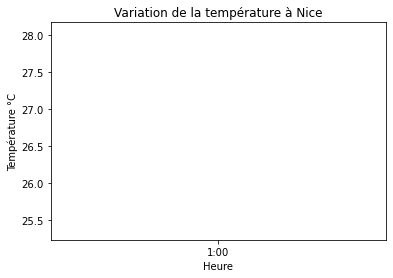

27.4        | 67      | 100820.0      | 4.6


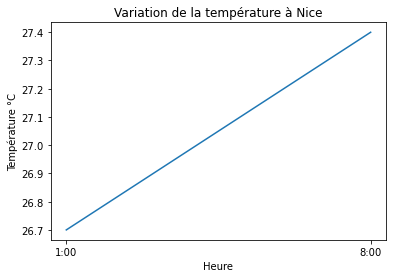

28.4        | 66      | 100890.0      | 3.8


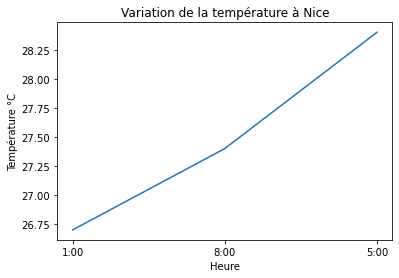

28.9        | 65      | 100910.0      | 4.5


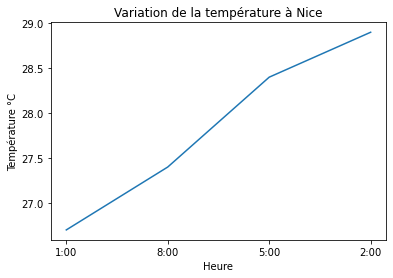

28.5        | 65      | 101010.0      | 4.8


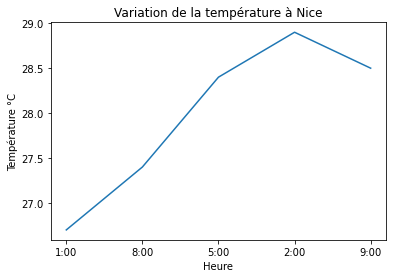

24.6        | 60      | 101010.0      | 4.9


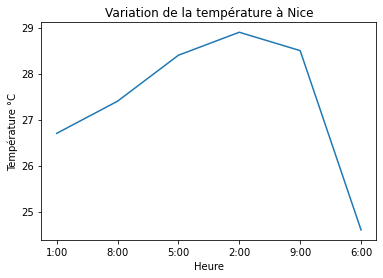

24.9        | 59      | 101020.0      | 4.6


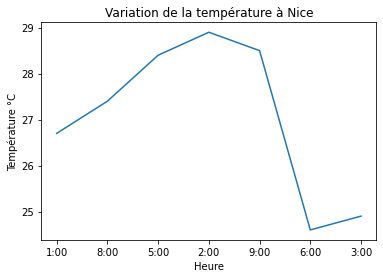

25.9        | 60      | 101120.0      | 3.4


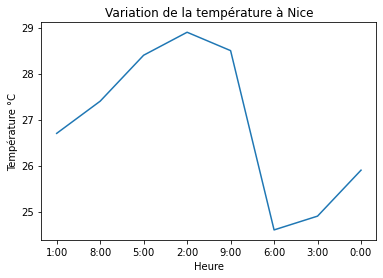

In [6]:
#Affichage de la date actuelle

h_actuelle=datetime.datetime.now() 
print("Nous sommes le", h_actuelle )

csvfile = open('data/mydata.csv', 'w', newline='')

spamwriter = csv.writer(csvfile, delimiter=';')

for i, line in enumerate(station):

    spamwriter.writerow(["température", "humidité", "précipitations", "Vitesse"])

    #Affichage du jeu de données

date = []
temp = []

#humid = []
#params= data["records"][0]["fields"].keys() #Récupération des en-têtes dans "fields"
print("Station: NICE, numéro 07690")
print("Température | Humidité| Précipitations| Vitesse du vent")

for record in data["records"]:
    d = record["fields"]["date"][12:16]
    t = str(record["fields"]["tc"])[:4]
    long= len("Température ")- len(t)
    for i in range(long-1):
        t=t+" "
    h = str(record["fields"]["u"])
    l1=len("Humidité")-len(h)
    for i in range(l1-1):
        h=h+" "
    precip=str(record["fields"]["pres"])
    l2=len("Précipitations")-len(precip)
    for i in range(l2-1):
        precip=precip+" "
    vit=str(record["fields"]["ff"])
    print(t, "|", h, "|", precip, "|", vit )
    date.append(d)
    temp.append(float(t))
    #humid.append(float(h))
    plt.plot(date, temp)
    #plt.plot(date, humid)
    plt.title("Variation de la température à Nice")
    plt.xlabel("Heure")
    plt.ylabel("Température °C")
    plt.show()      
 
spamwriter.writerow([t, h, precip, vit])

csvfile.close()


In [8]:
def degree_day(tmin, tmax, donnée):
    dj=0

    if donnée == "Température":
        if tmin < 0:
            tmin = 0

        if tmax > 30:
            tmax = 30

        dj = round(((tmax+tmin)/2)-0,1)

        if dj < 0 :
            dj = 0

 

    elif donnée == "humidité" :
        if tmin < 6:
            tmin = 6

        if tmax > 30:
            tmax = 30

        dj = round(((tmax+tmin)/2)-6,1)

        if dj < 0 :
            dj = 0

    elif donnée == "Précipitations" :

        if tmin < 0 :
            tmin = 0

        dj = round(((tmax+tmin)/2)-0,1)

        if dj < 0 :
            dj = 0

    elif donnée == "Vitesse du vent" :

        if tmin < 0 :
            tmin = 0

        if tmax > 30:
            tmax = 30

        dj = round(((tmax+tmin)/2)-0,1)

        if dj < 0 :
            dj = 0     

    return dj


crop = "Vitesse du vent"
json_records = data["records"]
dict_temp={}
tmin = 1000
tmax = -1000
tmin_save = 0
tmax_save = 0
date_save = ""


In [9]:
# Températures min et max de chaque jour mises dans un dictionnaire

for data in json_records:

    date = data["fields"]["date"][0:10]

    try :

        temp = (data["fields"]["tc"])

        if(date_save != date):          # cas général
            dict_temp[date] = [temp, temp]

        elif(date_save == date and temp < tmin):
            dict_temp[date][0] = temp

            tmin = temp

        elif(date_save == date and temp > tmax):
            dict_temp[date][1] = temp

            tmax = temp

    except KeyError:
        print("key error")

    date_save = date

 

dict_dd = {}

for date,l in dict_temp.items():

    dict_dd[date] = degree_day(l[0], l[1], crop)    # Degré-jour pour chaque date dans un dictionnaire

print(dict_dd)

 

sum_dd = 0

#☺ Somme des degrés-jours

for t in dict_dd.values():

    sum_dd += t

print("SUM DD = " , sum_dd)


{'2022-08-12': 26.8}
SUM DD =  26.8


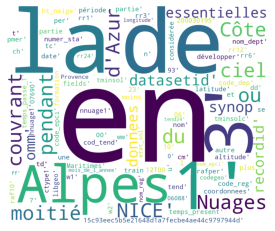

In [10]:
#Wordcloud

word_string= " "

word_string +=str(data)+" "

wordcloud = WordCloud(max_words=100, background_color='white', width=1200,height=1000).generate(word_string)
 
plt.imshow(wordcloud)

plt.axis('off')
   
plt.show();
        

In [11]:
a = pd.read_csv("data/mydata.csv", sep=";", encoding='latin-1')

# to save as html file 

# named as "Table"

a.to_html("data/test.htm")

# assign it to a 

# variable (string)

html_file = a.to_html()